In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import quanp as qp


In [ ]:
# S&P 500 metadata
df_metadata = qp.datasets.get_wiki_sp500_metadata()

# S&P 500 fundamentals
df_fundamental = qp.datasets.download_tickers_fundamental()

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import quanp as qp
# df_fundamental = qp.datasets.download_tickers_fundamental()
df_fundamental = pd.read_csv('data/metadata/sp500_metadata_fundamentalAdded.csv', index_col=0)
df_fundamental.columns

Index(['Security', 'SEC filings', 'GICS Sector', 'GICS Sub Industry',
       'Headquarters Location', 'Date first added', 'CIK', 'Founded', 'beta',
       'bookValuePerShare', 'currentRatio', 'divGrowthRate3Year',
       'dividendAmount', 'dividendDate', 'dividendPayAmount',
       'dividendPayDate', 'dividendYield', 'epsChange', 'epsChangePercentTTM',
       'epsChangeYear', 'epsTTM', 'grossMarginMRQ', 'grossMarginTTM', 'high52',
       'interestCoverage', 'low52', 'ltDebtToEquity', 'marketCap',
       'marketCapFloat', 'netProfitMarginMRQ', 'netProfitMarginTTM',
       'operatingMarginMRQ', 'operatingMarginTTM', 'pbRatio', 'pcfRatio',
       'peRatio', 'pegRatio', 'prRatio', 'quickRatio', 'returnOnAssets',
       'returnOnEquity', 'returnOnInvestment', 'revChangeIn', 'revChangeTTM',
       'revChangeYear', 'sharesOutstanding', 'shortIntDayToCover',
       'shortIntToFloat', 'symbol', 'totalDebtToCapital', 'totalDebtToEquity',
       'vol10DayAvg', 'vol1DayAvg', 'vol3MonthAvg'],
     

In [116]:
df_sector = pd.get_dummies(df_fundamental['GICS Sector'], 
                           prefix='Sector', prefix_sep='_')



In [117]:
ls_fundamental_target = ['beta','bookValuePerShare','currentRatio', 'dividendYield','epsChangePercentTTM','epsChangeYear',
 'epsTTM', 'grossMarginMRQ', 'grossMarginTTM', 'interestCoverage', 
 'ltDebtToEquity', 'marketCap', 'marketCapFloat', 'netProfitMarginMRQ', 'netProfitMarginTTM', 
 'operatingMarginMRQ', 'operatingMarginTTM', 'pbRatio', 'pcfRatio',
    'peRatio', 'pegRatio', 'prRatio', 'quickRatio', 'returnOnAssets',
    'returnOnEquity', 'returnOnInvestment', 'revChangeIn', 'revChangeTTM',
    'revChangeYear', 'sharesOutstanding', 'shortIntDayToCover',
    'shortIntToFloat', 'totalDebtToCapital', 'totalDebtToEquity',
    'vol10DayAvg', 'vol1DayAvg', 'vol3MonthAvg']

In [118]:
df_final = pd.merge(df_fundamental[ls_fundamental_target], df_sector, how='inner', 
                                                                    left_index=True,
                                                                    right_index=True)

In [119]:
df_final.columns

Index(['beta', 'bookValuePerShare', 'currentRatio', 'dividendYield',
       'epsChangePercentTTM', 'epsChangeYear', 'epsTTM', 'grossMarginMRQ',
       'grossMarginTTM', 'interestCoverage', 'ltDebtToEquity', 'marketCap',
       'marketCapFloat', 'netProfitMarginMRQ', 'netProfitMarginTTM',
       'operatingMarginMRQ', 'operatingMarginTTM', 'pbRatio', 'pcfRatio',
       'peRatio', 'pegRatio', 'prRatio', 'quickRatio', 'returnOnAssets',
       'returnOnEquity', 'returnOnInvestment', 'revChangeIn', 'revChangeTTM',
       'revChangeYear', 'sharesOutstanding', 'shortIntDayToCover',
       'shortIntToFloat', 'totalDebtToCapital', 'totalDebtToEquity',
       'vol10DayAvg', 'vol1DayAvg', 'vol3MonthAvg',
       'Sector_Communication Services', 'Sector_Consumer Discretionary',
       'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials',
       'Sector_Health Care', 'Sector_Industrials',
       'Sector_Information Technology', 'Sector_Materials',
       'Sector_Real Estate', 'Sector_Utili

In [120]:
adata = qp.AnnData(df_fundamental[ls_fundamental_target])

In [121]:
qp.pp.log1p(adata)

In [122]:
qp.pp.scale(adata)

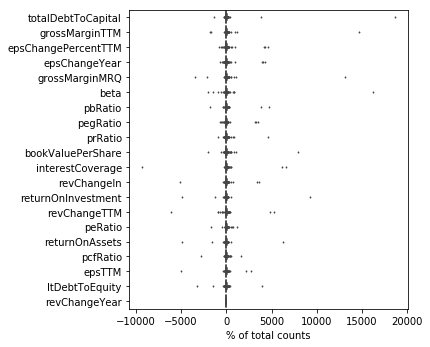

In [123]:
qp.pl.highest_expr_features(adata, n_top=20)

In [87]:
adata.obs['Sector'] = df_fundamental['GICS Sector']

In [88]:
adata

AnnData object with n_obs × n_vars = 505 × 37
    obs: 'Sector'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [89]:
qp.tl.pca(adata, svd_solver='arpack')

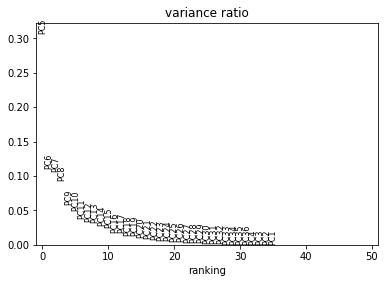

In [90]:
qp.pl.pca_variance_ratio(adata, n_pcs=50)

In [14]:
qp.pp.neighbors(adata)

/Users/leehongkai/anaconda/envs/trading_py36/lib/python3.6/site-packages/umap/umap_.py:330: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../anaconda/envs/trading_py36/lib/python3.6/site-packages/umap/umap_.py", line 445:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/Users/leehongkai/anaconda/envs/trading_py36/lib/python3.6/site-packages/numba/core/object_mode_passes.py:178: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../anaconda/envs/trading_py36/lib/python3.6/site-packages/umap/umap_.py", line 331:
@numba.jit()
def fuzzy_simplicial_set(
^

  state.func_ir.loc))
/Users/leehongkai/anac

In [49]:
qp.tl.umap(adata)

In [15]:
qp.tl.tsne(adata)

In [16]:
qp.tl.leiden(adata)

In [17]:
qp.tl.dendrogram(adata, 'leiden', var_names=adata.var_names)

... storing 'Sector' as categorical


/Users/leehongkai/anaconda/envs/trading_py36/lib/python3.6/site-packages/pandas/compat/_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


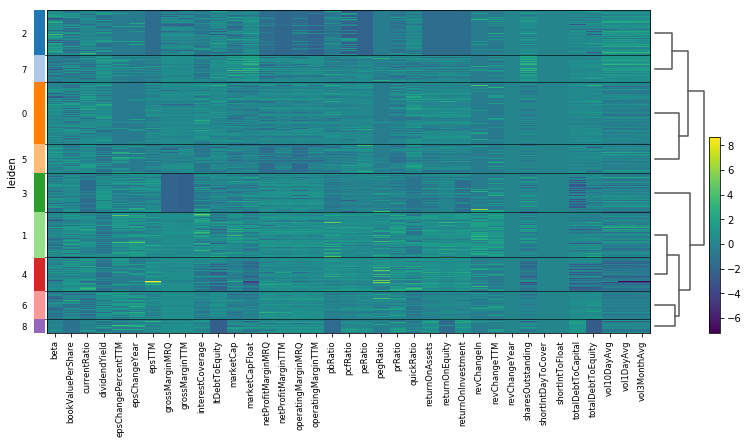

In [18]:
qp.pl.heatmap(adata, adata.var_names, 'leiden', dendrogram=True)

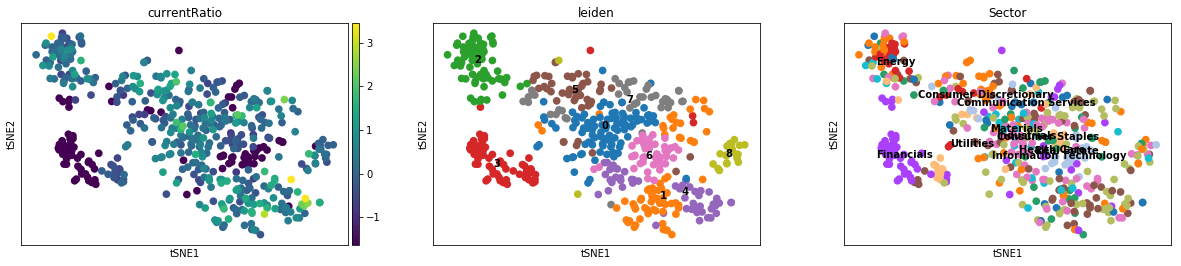

In [55]:
qp.pl.tsne(adata, color=['currentRatio', 'leiden', 'Sector'], legend_loc='on data')

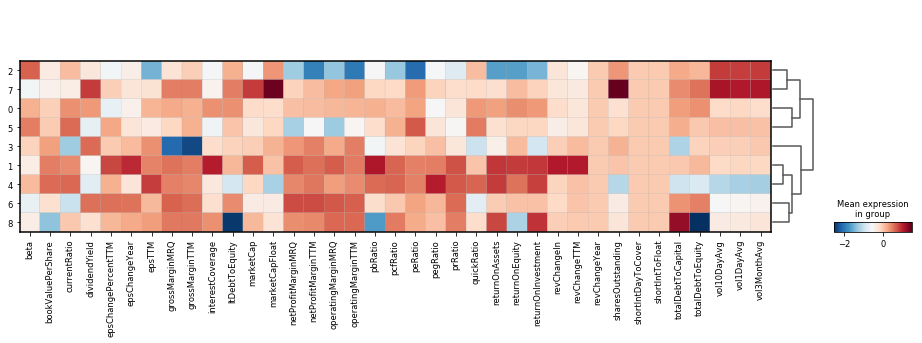

In [20]:
qp.pl.matrixplot(adata, adata.var_names, 'leiden', dendrogram=True, cmap='RdBu_r')

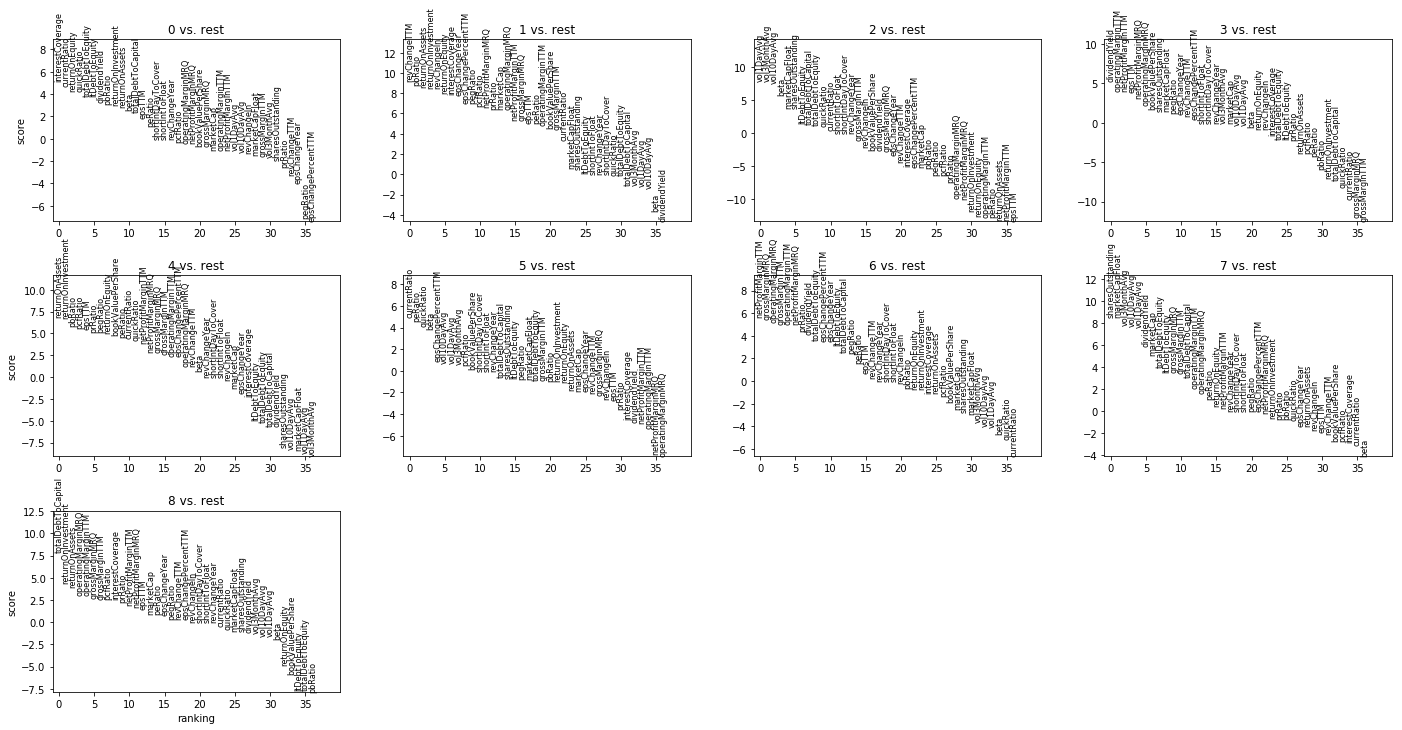

In [30]:
qp.tl.rank_features_groups(adata, 'leiden', method='wilcoxon')
qp.pl.rank_features_groups(adata, n_features=40, sharey=False)

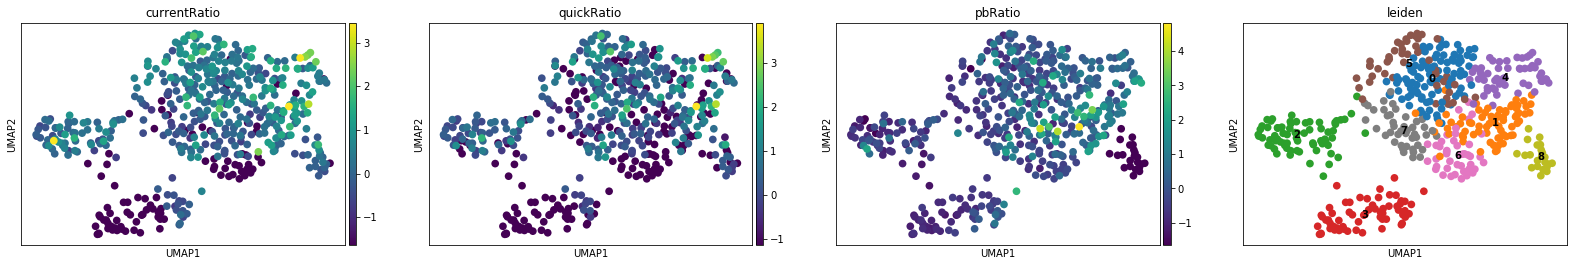

In [60]:
qp.pl.umap(adata, color=['currentRatio', 'quickRatio', 'pbRatio', 'leiden'], legend_loc='on data')

In [59]:
df_crosstab_sectorVSleiden.loc['AMZN']

leiden                         1
Sector    Consumer Discretionary
Name: AMZN, dtype: object

In [64]:
df_crosstab_sectorVSleiden[df_crosstab_sectorVSleiden.leiden == '7']

,leiden,Sector
ABT,7,Health Care
AES,7,Utilities
AMCR,7,Materials
AEP,7,Utilities
AXP,7,Financials
AAPL,7,Information Technology
T,7,Communication Services
COG,7,Energy
CTL,7,Communication Services
SCHW,7,Financials


In [48]:
pd.crosstab(df_crosstab_sectorVSleiden['Sector'], df_crosstab_sectorVSleiden['leiden'])

leiden,0,1,2,3,4,5,6,7,8
Sector,,,,,,,,,
Communication Services,8,5,5,0,3,0,1,4,0
Consumer Discretionary,7,9,16,0,4,19,0,0,6
Consumer Staples,5,11,4,0,2,2,3,5,1
Energy,2,0,17,0,0,3,0,4,0
Financials,2,3,4,44,2,0,6,4,1
Health Care,6,14,6,5,11,10,2,6,2
Industrials,32,7,7,0,13,8,2,1,3
Information Technology,19,15,4,2,14,2,1,7,7
Materials,14,5,4,0,3,0,0,1,1


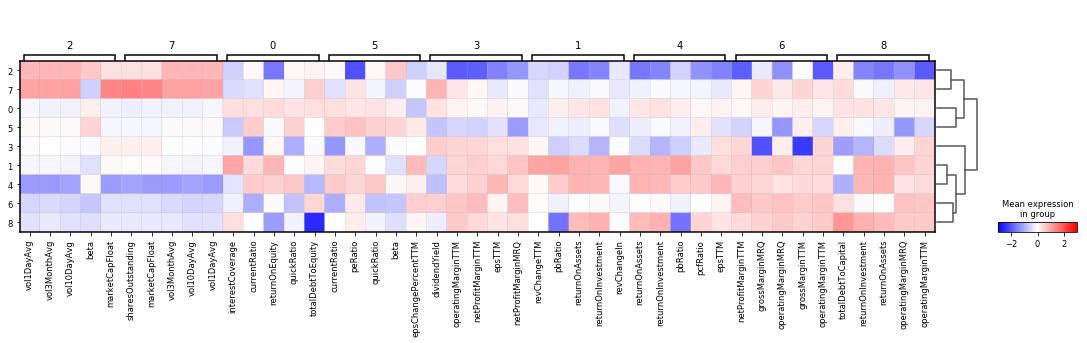

In [31]:
qp.pl.rank_features_groups_matrixplot(adata, n_features=5, use_raw=False, vmin=-3, vmax=3, cmap='bwr')

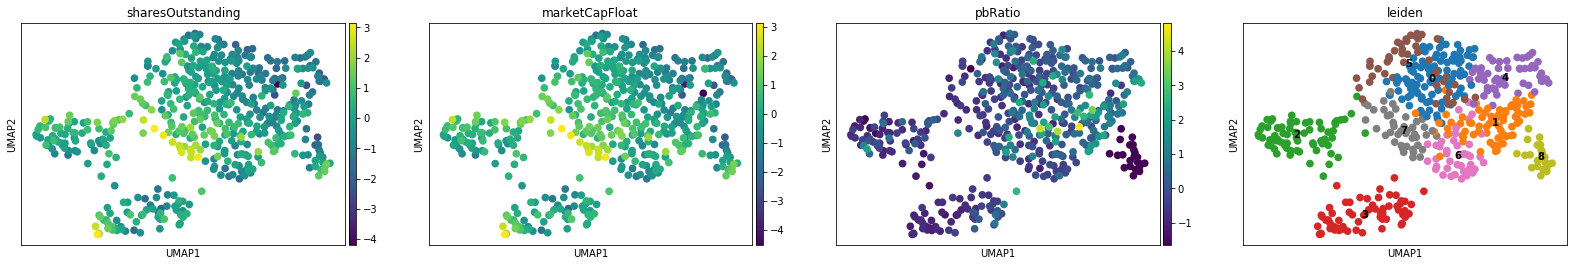

In [62]:
qp.pl.umap(adata, color=['sharesOutstanding', 'marketCapFloat', 'pbRatio', 'leiden'], legend_loc='on data')

In [46]:
df_crosstab_sectorVSleiden = pd.merge(pd.DataFrame(adata.obs['leiden']), pd.DataFrame(adata.obs['Sector']), 
                                      how='inner', left_index=True, right_index=True)

In [47]:
df_crosstab_sectorVSleiden

,leiden,Sector
MMM,0,Industrials
ABT,7,Health Care
ABBV,1,Health Care
ABMD,4,Health Care
ACN,1,Information Technology
...,...,...
YUM,8,Consumer Discretionary
ZBRA,4,Information Technology
ZBH,5,Health Care
ZION,3,Financials


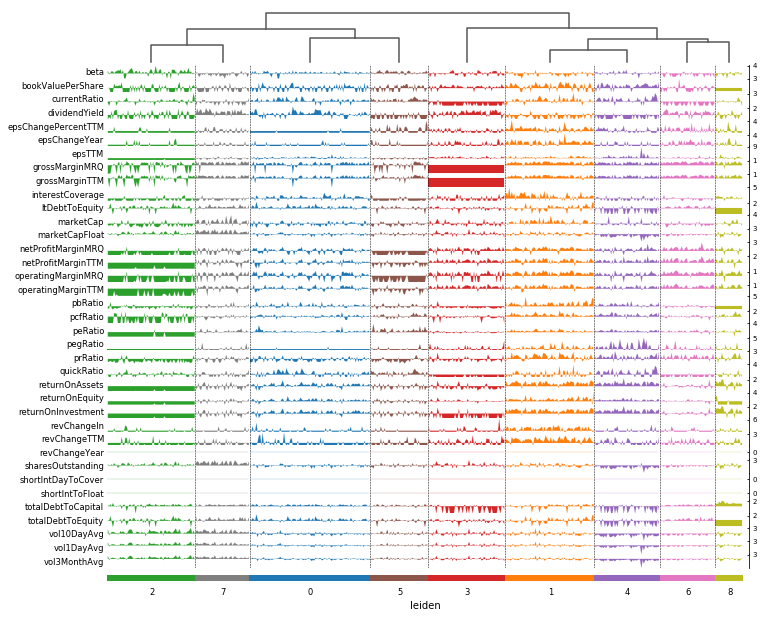

In [33]:
# qp.pl.tracksplot(adata, adata.var_names, groupby='leiden', dendrogram=True)

In [26]:
# # S&P 500 historical members
# df_sp500 = qc.datasets.wiki_sp500_members_update('update_20200802.csv')
df_sp500.tail()

NameError: name 'df_sp500' is not defined

In [ ]:
adata = qp.AnnData(df_metadata)

In [ ]:
pd.__version__

In [25]:
import yahoo_fin.stock_info as si

income_statement = si.get_balance_sheet("aapl", yearly = True, quarterly = True)
income_statement

TypeError: get_balance_sheet() got an unexpected keyword argument 'quarterly'

In [34]:
import pandas as pd
si.get_financials(ticker, yearly = True, quarterly = True)['quarterly_cash_flow']

endDate,2020-06-27,2020-03-28,2019-12-28,2019-09-28
Breakdown,,,,
investments,-2.998000e+09,1.133800e+10,-1.047300e+10,2.802000e+09
changeToLiabilities,3.159000e+09,-1.219300e+10,-1.040000e+08,1.803200e+10
totalCashflowsFromInvestingActivities,-5.165000e+09,9.013000e+09,-1.366800e+10,-7.980000e+08
netBorrowings,2.168000e+09,8.030000e+08,2.310000e+08,-2.930000e+08
totalCashFromFinancingActivities,-1.911600e+10,-2.094000e+10,-2.540700e+10,-2.103900e+10
changeToOperatingActivities,-7.650000e+08,4.195000e+09,2.362000e+09,-6.319000e+09
netIncome,1.125300e+10,1.124900e+10,2.223600e+10,1.368600e+10
changeInCash,-8.010000e+09,1.384000e+09,-8.559000e+09,-1.927000e+09
repurchaseOfStock,-1.755900e+10,-1.876100e+10,-2.208500e+10,-1.763500e+10
